# String Pot Calibration

1. Study the linearity of string pot
2. create fig of linearity
3. put calibration results into Python object for use in `excavator.py`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
mpl.style.use('mitch-exp')

In [4]:
data = pd.read_csv('pot_calibrate_05_11.csv')

In [70]:
bm_cal = data.set_index('bm_measure')['bm_read'].dropna()
sk_cal = data.set_index('sk_measure')['sk_read'].dropna()
bk_cal = data.set_index('bk_measure')['bk_read'].dropna()

bm_cal, sk_cal, bk_cal

(bm_measure
 0.00      535.0
 11.86     580.0
 21.59     624.0
 33.42     671.0
 45.72     720.0
 49.58     736.0
 59.22     774.0
 68.76     805.0
 78.03     836.0
 85.90     860.0
 93.54     885.0
 102.72    906.0
 Name: bm_read, dtype: float64, sk_measure
 0.00       591
 14.97      656
 23.38      693
 32.45      725
 40.32      757
 52.05      798
 59.98      823
 69.42      854
 79.70      886
 88.47      912
 97.65      938
 107.07     963
 114.19     980
 123.15    1003
 130.29    1019
 135.31    1030
 142.58    1048
 148.35    1060
 Name: sk_read, dtype: int64, bk_measure
 0.00      149.0
 11.42     208.0
 22.60     269.0
 37.20     342.0
 49.68     395.0
 61.95     445.0
 70.53     478.0
 76.48     502.0
 88.90     551.0
 98.52     584.0
 107.15    612.0
 109.10    618.0
 Name: bk_read, dtype: float64)

In [71]:
bm_cal.name = 'Boom Pot'
sk_cal.name = 'Stick Pot'
bk_cal.name = 'Bucket Pot'

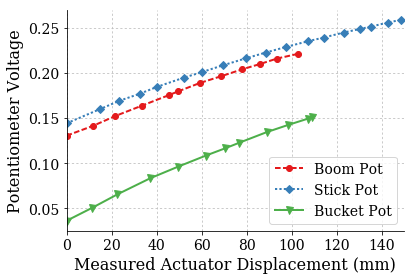

In [79]:
(bm_cal / 4096.0).plot(linestyle='--', marker='o')
(sk_cal / 4096.0).plot(linestyle=':', marker='D')
(bk_cal / 4096.0).plot(marker='v', markersize=7)
plt.xlabel('Measured Actuator Displacement (mm)')
plt.ylabel('Potentiometer Voltage')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xbound(0, 150)
plt.tight_layout()
plt.legend()
plt.savefig('figs/pot_calibration.pdf')

## Copy to excavator.py

In [78]:
', '.join([a for a in str(np.array([bk_cal.values, bk_cal.index.values])).split(' ') if a is not ''])

'[[, 149., 208., 269., 342., 395., 445., 478., 502., 551.\n, 584., 612., 618., ]\n, [, 0., 11.42, 22.6, 37.2, 49.68, 61.95, 70.53, 76.48, 88.9\n, 98.52, 107.15, 109.1, ]]'